#Telecom churnm case study

In [1]:
#importi8ng libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#reading dataset
data_set = pd.read_csv('telecom_churn_data.csv')
data_set.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
data_set.shape

(99999, 226)

In [5]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
data_set.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

In [6]:
# identify missing value columns
data_set.isnull().sum()*100/data_set.shape[0]

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_

In [7]:
#its observed that most of the recharge columns have more n ull values. Lets have a look at their min and. max values
reach_cols = [ 'count_rech_2g_6', 'count_rech_2g_7', 'max_rech_data_7' ,'count_rech_2g_8', 'count_rech_2g_9',
              'max_rech_data_6', 'max_rech_data_8', 'av_rech_amt_data_8', 'max_rech_data_9',
              'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_9',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',]
data_set[reach_cols].describe(include = 'all')

,count_rech_2g_6,count_rech_2g_7,max_rech_data_7,count_rech_2g_8,count_rech_2g_9,max_rech_data_6,max_rech_data_8,av_rech_amt_data_8,max_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9
count,25153.000000,25571.000000,25571.000000,26339.000000,25922.000000,25153.000000,26339.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000
mean,1.864668,2.044699,126.729459,2.016288,1.781807,126.393392,125.717301,197.526489,124.94144,2.463802,2.666419,2.651999,2.441170,192.600982,200.981292,192.734315,0.599133,0.621720,0.635711,0.659363
std,2.570254,2.768332,109.765267,2.720132,2.214701,108.477235,109.437851,191.301305,111.36376,2.789128,3.031593,3.074987,2.516339,192.646318,196.791224,188.400286,1.274428,1.394524,1.422827,1.411513
min,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,25.000000,1.000000,1.000000,25.000000,25.000000,87.000000,25.00000,1.000000,1.000000,1.000000,1.000000,82.000000,92.000000,69.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,145.000000,1.000000,1.000000,145.000000,145.000000,154.000000,145.00000,1.000000,1.000000,1.000000,2.000000,154.000000,154.000000,164.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,177.000000,2.000000,2.000000,177.000000,179.000000,252.000000,179.00000,3.000000,3.000000,3.000000,3.000000,252.000000,252.000000,252.000000,1.000000,1.000000,1.000000,1.000000
max,42.000000,48.000000,1555.000000,44.000000,40.000000,1555.000000,1555.000000,4076.000000,1555.00000,61.000000,54.000000,60.000000,84.000000,7546.000000,4365.000000,4061.000000,29.000000,35.000000,45.000000,49.000000


In [8]:
# to handle missing values - Let's impute Recharge amount and recharge data columns of each month with zero indicating 
#that the customer dint recharge in theese months
impute_cols = ['av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
               'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
    'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',]
data_set[impute_cols] = data_set[impute_cols].apply(lambda x: x.fillna(0))

In [9]:
#encoding category columns
cols_category =  ['night_pck_user_6','fb_user_9','fb_user_8','night_pck_user_8','night_pck_user_7','night_pck_user_9','fb_user_6','fb_user_7',]
# filling -1 in category cols with Na values
data_set[cols_category] = data_set[cols_category].apply(lambda x: x.fillna(-1))
data_set[cols_category].head(20)

,night_pck_user_6,fb_user_9,fb_user_8,night_pck_user_8,night_pck_user_7,night_pck_user_9,fb_user_6,fb_user_7
0,0.0,-1.0,1.0,0.0,0.0,-1.0,1.0,1.0
1,-1.0,-1.0,1.0,0.0,0.0,-1.0,-1.0,1.0
2,-1.0,1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0
3,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0
5,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
6,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
7,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
8,-1.0,-1.0,1.0,0.0,0.0,-1.0,-1.0,1.0
9,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,1.0


In [10]:
# dropping unique cols and date cols as theese are unwanted
data_set = data_set.drop(['circle_id','mobile_number'], axis=1)

In [11]:
# dropping  date cols 
date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9']
data_set = data_set.drop(date_cols, axis=1)

In [12]:
# dropping cols with more than 70 percent after nulol value imputation
cols_to_include = list(data_set.apply(lambda column: True if column.isnull().sum()/data_set.shape[0] < 0.7 else False))
data_set =data_set.loc[:,cols_to_include]
data_set.head(5)

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0.0,0.0,0.0,-1.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,-1.0,968,30.4,0.0,101.20,3.58
1,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.0,0.0,0.0

In [13]:
data_set.shape

(99999, 196)

# Filtering high  value customers

In [14]:
# calculating the average recahrge amount in the good phase ( months 6 and 7)

# calculate the total data recharge amount for June and July --> number of recharges * average recharge amount
data_set['total_data_rech_6'] = data_set.total_rech_data_6 * data_set.av_rech_amt_data_6
data_set['total_data_rech_7'] = data_set.total_rech_data_7 * data_set.av_rech_amt_data_7

data_set['total_amount_data_6'] = data_set.total_rech_amt_6 + data_set.total_data_rech_6
data_set['total_amount_data_7'] = data_set.total_rech_amt_7 + data_set.total_data_rech_7

In [15]:
# calculate the average amount spend by the customer in the m0onths 6 and 7
data_set['avg_amounnt_spend_6_7'] = (data_set.total_amount_data_6 + data_set.total_amount_data_7)/2

In [16]:
# code to find the 70th percentile
data_set.avg_amounnt_spend_6_7.quantile(0.7)

478.0

In [17]:
# code to filter out high value customers
data_set = data_set.loc[data_set.avg_amounnt_spend_6_7 > data_set.avg_amounnt_spend_6_7.quantile(0.7), :]
data_set = data_set.reset_index(drop=True)
data_set.shape

(29953, 201)

In [18]:
data_set.isnull().sum()*100/data_set.shape[0]

loc_og_t2o_mou           0.744500
std_og_t2o_mou           0.744500
loc_ic_t2o_mou           0.744500
arpu_6                   0.000000
arpu_7                   0.000000
arpu_8                   0.000000
arpu_9                   0.000000
onnet_mou_6              1.809502
onnet_mou_7              1.789470
onnet_mou_8              3.912797
onnet_mou_9              6.336594
offnet_mou_6             1.809502
offnet_mou_7             1.789470
offnet_mou_8             3.912797
offnet_mou_9             6.336594
roam_ic_mou_6            1.809502
roam_ic_mou_7            1.789470
roam_ic_mou_8            3.912797
roam_ic_mou_9            6.336594
roam_og_mou_6            1.809502
roam_og_mou_7            1.789470
roam_og_mou_8            3.912797
roam_og_mou_9            6.336594
loc_og_t2t_mou_6         1.809502
loc_og_t2t_mou_7         1.789470
loc_og_t2t_mou_8         3.912797
loc_og_t2t_mou_9         6.336594
loc_og_t2m_mou_6         1.809502
loc_og_t2m_mou_7         1.789470
loc_og_t2m_mou

In [19]:
data_set[['total_data_rech_6','total_data_rech_7','total_amount_data_6','total_amount_data_7']].head(5)

,total_data_rech_6,total_data_rech_7,total_amount_data_6,total_amount_data_7
0,252.0,252.0,614.0,504.0
1,0.0,0.0,1580.0,790.0
2,0.0,354.0,437.0,955.0
3,0.0,0.0,600.0,680.0
4,0.0,712.0,0.0,1166.0


In [20]:
#removing the derived colums for highvalue customer calculation
data_set=data_set.drop(['total_data_rech_6','total_data_rech_7','total_amount_data_6','total_amount_data_7'],axis =1)
data_set.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_amounnt_spend_6_7
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0.0,0.0,0.0,-1.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,-1.0,968,30.40,0.00,101.20,3.58,559.0
1,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.

In [21]:
data_set.shape

(29953, 197)

In [22]:
# set churn value for each row
# calculate total incoming and outgoing minutes of usage
data_set['total_calls_mou_9'] = data_set.total_ic_mou_9 + data_set.total_og_mou_9
# calculate 2g and 3g data consumption
data_set['total_internet_mb_9'] =  data_set.vol_2g_mb_9 + data_set.vol_3g_mb_9
# create churn variable: those who have not used either calls or internet in the month of September are customers who have churned

# 0 - not churn, 1 - churn
data_set['churn'] = data_set.apply(lambda row: 1 if (row.total_calls_mou_9 == 0 and row.total_internet_mb_9 == 0) else 0, axis=1)
# delete derived variables
data_set = data_set.drop(['total_calls_mou_9', 'total_internet_mb_9'], axis=1)
# change data type to category
data_set.churn = data_set.churn.astype("category")

# print churn ratio
print("Churn Ratio:")
print(data_set.churn.value_counts()*100/data_set.shape[0])

Churn Ratio:
0    91.877274
1     8.122726
Name: churn, dtype: float64


In [23]:
#Deleting all columns asscociated with the churn month

cols_of_churn_mnth = data_set.filter(regex='9$', axis=1).columns

# update num_cols and cat_cols column name list
cols_category = [col for col in cols_category if col not in cols_of_churn_mnth]
cols_category.append('churn')
data_set = data_set.filter(regex='[^9]$', axis=1)
num_cols = [col for col in data_set.columns if col not in cols_category]

In [24]:
num_cols

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou

In [25]:
# identify missing value columns
data_set.isnull().sum()*100/data_set.shape[0]

loc_og_t2o_mou           0.744500
std_og_t2o_mou           0.744500
loc_ic_t2o_mou           0.744500
arpu_6                   0.000000
arpu_7                   0.000000
arpu_8                   0.000000
onnet_mou_6              1.809502
onnet_mou_7              1.789470
onnet_mou_8              3.912797
offnet_mou_6             1.809502
offnet_mou_7             1.789470
offnet_mou_8             3.912797
roam_ic_mou_6            1.809502
roam_ic_mou_7            1.789470
roam_ic_mou_8            3.912797
roam_og_mou_6            1.809502
roam_og_mou_7            1.789470
roam_og_mou_8            3.912797
loc_og_t2t_mou_6         1.809502
loc_og_t2t_mou_7         1.789470
loc_og_t2t_mou_8         3.912797
loc_og_t2m_mou_6         1.809502
loc_og_t2m_mou_7         1.789470
loc_og_t2m_mou_8         3.912797
loc_og_t2f_mou_6         1.809502
loc_og_t2f_mou_7         1.789470
loc_og_t2f_mou_8         3.912797
loc_og_t2c_mou_6         1.809502
loc_og_t2c_mou_7         1.789470
loc_og_t2c_mou

In [26]:
#cols that still have null values
cols_with_null_values = ['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','onnet_mou_6','onnet_mou_7','onnet_mou_8','offnet_mou_6','offnet_mou_7','offnet_mou_8','roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','roam_og_mou_6','roam_og_mou_7','roam_og_mou_8','loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8','loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8',
'loc_og_t2f_mou_6',
'loc_og_t2f_mou_7',
'loc_og_t2f_mou_8',
'loc_og_t2c_mou_6',
'loc_og_t2c_mou_7',
'loc_og_t2c_mou_8',
'loc_og_mou_6',
'loc_og_mou_7',
'loc_og_mou_8',
'std_og_t2t_mou_6',
'std_og_t2t_mou_7',
'std_og_t2t_mou_8',
'std_og_t2m_mou_6',
'std_og_t2m_mou_7',
'std_og_t2m_mou_8',
'std_og_t2f_mou_6',
'std_og_t2f_mou_7',
'std_og_t2f_mou_8',
'std_og_t2c_mou_6',
'std_og_t2c_mou_7',
'std_og_t2c_mou_8',
'std_og_mou_6',
'std_og_mou_7',
'std_og_mou_8',
'isd_og_mou_6',
'isd_og_mou_7',
'isd_og_mou_8',
'spl_og_mou_6',
'spl_og_mou_7',
'spl_og_mou_8',
'og_others_6',
'og_others_7',
'og_others_8',
'loc_ic_t2t_mou_6',
'loc_ic_t2t_mou_7',
'loc_ic_t2t_mou_8',
'loc_ic_t2m_mou_6',
'loc_ic_t2m_mou_7',
'loc_ic_t2m_mou_8',
'loc_ic_t2f_mou_6',
'loc_ic_t2f_mou_7',
'loc_ic_t2f_mou_8',
'loc_ic_mou_6',
'loc_ic_mou_7',
'loc_ic_mou_8',
'std_ic_t2t_mou_6',
'std_ic_t2t_mou_7',
'std_ic_t2t_mou_8',
'std_ic_t2m_mou_6',
'std_ic_t2m_mou_7',
'std_ic_t2m_mou_8',
'std_ic_t2f_mou_6',
'std_ic_t2f_mou_7',
'std_ic_t2f_mou_8',
'std_ic_t2o_mou_6',
'std_ic_t2o_mou_7',
'std_ic_t2o_mou_8',
'std_ic_mou_6',
'std_ic_mou_7',
'std_ic_mou_8',
'spl_ic_mou_6',
'spl_ic_mou_7',
'spl_ic_mou_8',
'isd_ic_mou_6',
'isd_ic_mou_7',
'isd_ic_mou_8',
'ic_others_6',
'ic_others_7',
'ic_others_8',]
data_set[cols_with_null_values].describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8
count,29730.0,29730.0,29730.0,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.00000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.0,29417.0,28781.0,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.00000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.0,29417.0,28781.0,29411.000000,29417.00000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000
mean,0.0,0.0,0.0,265.708886,272.935850,243.888097,380.688975,385.124799,348.769656,16.421142,12.876567,13.021785,27.086158,20.522376,20.699213,86.132694,87.325499,81.335840,166.319093,166.059185,157.991961,6.465337,6.543588,6.13179,1.606448,1.923151,1.771192,258.925500,259.936784,245.467775,168.955188,177.555468,154.637926,182.745959,191.386731,163.729361,1.839579,1.861677,1.651356,0.0,0.0,0.0,353.544517,370.807662,320.022119,2.215077,2.147442,2.031569,5.932425,7.236205,6.815709,0.673738,0.043743,0.060043,66.716145,67.902007,65.214092,153.247230,154.476487,152.261573,15.573525,16.338826,15.001872,235.54671,238.727204,232.487260,15.171358,15.714036,14.486670,29.750789,31.390063,29.057314,2.748564,2.852873,2.669392,0.0,0.0,0.0,47.674363,49.96069,46.216895,0.062172,0.020127,0.027629,11.000045,12.109901,11.463609,1.176512,1.529164,1.276098
std,0.0,0.0,0.0,462.692744,483.282132,465.505577,484.441095,501.024091,486.836956,77.012820,76.501945,75.630647,117.284108,96.967183,106.833757,230.772468,242.604091,231.568708,251.520947,242.861350,236.400416,22.325687,22.139032,19.87269,6.362330,9.222969,7.283267,380.427567,377.425594,367.684574,407.062339,424.628964,404.703718,412.163655,436.993218,416.022314,12.096247,13.105831,11.155894,0.0,0.0,0.0,612.586672,644.027079,618.155518,46.308790,45.994139,45.648034,17.722515,21.945037,20.655031,4.147630,2.703227,3.384640,165.114630,168.796988,161.718004,220.371043,219.376853,217.252410,46.157703,49.599800,44.109276,316.31175,317.443202,311.323739,78.436831,83.83

In [27]:
data_set.shape

(29953, 151)

In [28]:
#its observed that few columns onlu have zero values. Lets drop those coluns
cols_to_drop = ['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8']
data_set = data_set.drop(cols_to_drop,axis=1)
data_set.shape

(29953, 142)

In [29]:
# there are few columns with maximum number values are zerol. Lets impute theese columns NA values with Zero
cols_to_zero = ['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','roam_og_mou_6','roam_og_mou_7','roam_og_mou_8','loc_og_t2c_mou_6','loc_og_t2c_mou_7',
                'loc_og_t2c_mou_8','std_og_t2f_mou_6','std_og_t2f_mou_7','std_og_t2f_mou_8','isd_og_mou_6','isd_og_mou_7','isd_og_mou_8',
                'og_others_6','og_others_7','og_others_8','std_ic_t2f_mou_6','std_ic_t2f_mou_7','std_ic_t2f_mou_8',
                'spl_ic_mou_6','spl_ic_mou_7','spl_ic_mou_8','isd_ic_mou_6','isd_ic_mou_7','isd_ic_mou_8','ic_others_6','ic_others_7','ic_others_8',
               ]
data_set[cols_to_zero] = data_set[cols_to_zero].apply(lambda x: x.fillna(0))
data_set.shape

(29953, 142)

In [30]:
# there are still few columns that have na values. Lets impute theese columns with its median value since there are outliers
pending_cols = [col for col in cols_with_null_values if col not in cols_to_drop + cols_to_zero ]
len(pending_cols)

51

In [31]:
for col in pending_cols:
    median = data_set[col].quantile(0.5)
    data_set[col] = data_set[col].fillna(median)
    
data_set.shape
   

(29953, 142)

In [32]:
data_set.shape

(29953, 142)

In [33]:
# derive new columns that show the diffrernce in customer behaviour in the good phase and the action phase
data_set['arpu_diff'] = data_set.arpu_8 - ((data_set.arpu_6 + data_set.arpu_7)/2)

data_set['onnet_mou_diff'] = data_set.onnet_mou_8 - ((data_set.onnet_mou_6 + data_set.onnet_mou_7)/2)

data_set['offnet_mou_diff'] = data_set.offnet_mou_8 - ((data_set.offnet_mou_6 + data_set.offnet_mou_7)/2)

data_set['roam_ic_mou_diff'] = data_set.roam_ic_mou_8 - ((data_set.roam_ic_mou_6 + data_set.roam_ic_mou_7)/2)

data_set['roam_og_mou_diff'] = data_set.roam_og_mou_8 - ((data_set.roam_og_mou_6 + data_set.roam_og_mou_7)/2)

data_set['loc_og_mou_diff'] = data_set.loc_og_mou_8 - ((data_set.loc_og_mou_6 + data_set.loc_og_mou_7)/2)

data_set['std_og_mou_diff'] = data_set.std_og_mou_8 - ((data_set.std_og_mou_6 + data_set.std_og_mou_7)/2)

data_set['isd_og_mou_diff'] = data_set.isd_og_mou_8 - ((data_set.isd_og_mou_6 + data_set.isd_og_mou_7)/2)

data_set['spl_og_mou_diff'] = data_set.spl_og_mou_8 - ((data_set.spl_og_mou_6 + data_set.spl_og_mou_7)/2)

data_set['total_og_mou_diff'] = data_set.total_og_mou_8 - ((data_set.total_og_mou_6 + data_set.total_og_mou_7)/2)

data_set['loc_ic_mou_diff'] = data_set.loc_ic_mou_8 - ((data_set.loc_ic_mou_6 + data_set.loc_ic_mou_7)/2)

data_set['std_ic_mou_diff'] = data_set.std_ic_mou_8 - ((data_set.std_ic_mou_6 + data_set.std_ic_mou_7)/2)

data_set['isd_ic_mou_diff'] = data_set.isd_ic_mou_8 - ((data_set.isd_ic_mou_6 +  data_set.isd_ic_mou_7)/2)

data_set['spl_ic_mou_diff'] = data_set.spl_ic_mou_8 - ((data_set.spl_ic_mou_6 + data_set.spl_ic_mou_7)/2)

data_set['total_ic_mou_diff'] = data_set.total_ic_mou_8 - ((data_set.total_ic_mou_6 + data_set.total_ic_mou_7)/2)

data_set['total_rech_num_diff'] = data_set.total_rech_num_8 - ((data_set.total_rech_num_6 + data_set.total_rech_num_7)/2)

data_set['total_rech_amt_diff'] = data_set.total_rech_amt_8 - ((data_set.total_rech_amt_6 + data_set.total_rech_amt_7)/2)

data_set['max_rech_amt_diff'] = data_set.max_rech_amt_8 - ((data_set.max_rech_amt_6 + data_set.max_rech_amt_7)/2)

data_set['total_rech_data_diff'] = data_set.total_rech_data_8 - ((data_set.total_rech_data_6 + data_set.total_rech_data_7)/2)

data_set['max_rech_data_diff'] = data_set.max_rech_data_8 - ((data_set.max_rech_data_6 + data_set.max_rech_data_7)/2)

data_set['av_rech_amt_data_diff'] = data_set.av_rech_amt_data_8 - ((data_set.av_rech_amt_data_6 + data_set.av_rech_amt_data_7)/2)

data_set['vol_2g_mb_diff'] = data_set.vol_2g_mb_8 - ((data_set.vol_2g_mb_6 + data_set.vol_2g_mb_7)/2)

data_set['vol_3g_mb_diff'] = data_set.vol_3g_mb_8 - ((data_set.vol_3g_mb_6 + data_set.vol_3g_mb_7)/2)

In [34]:
# all the null values are cleared now
data_set.isnull().sum()*100/data_set.shape[0]


arpu_6                   0.0
arpu_7                   0.0
arpu_8                   0.0
onnet_mou_6              0.0
onnet_mou_7              0.0
onnet_mou_8              0.0
offnet_mou_6             0.0
offnet_mou_7             0.0
offnet_mou_8             0.0
roam_ic_mou_6            0.0
roam_ic_mou_7            0.0
roam_ic_mou_8            0.0
roam_og_mou_6            0.0
roam_og_mou_7            0.0
roam_og_mou_8            0.0
loc_og_t2t_mou_6         0.0
loc_og_t2t_mou_7         0.0
loc_og_t2t_mou_8         0.0
loc_og_t2m_mou_6         0.0
loc_og_t2m_mou_7         0.0
loc_og_t2m_mou_8         0.0
loc_og_t2f_mou_6         0.0
loc_og_t2f_mou_7         0.0
loc_og_t2f_mou_8         0.0
loc_og_t2c_mou_6         0.0
loc_og_t2c_mou_7         0.0
loc_og_t2c_mou_8         0.0
loc_og_mou_6             0.0
loc_og_mou_7             0.0
loc_og_mou_8             0.0
std_og_t2t_mou_6         0.0
std_og_t2t_mou_7         0.0
std_og_t2t_mou_8         0.0
std_og_t2m_mou_6         0.0
std_og_t2m_mou

In [35]:
data_set.shape

(29953, 165)

# EDA

In [37]:
# change columns types
cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             'churn',
            ]

num_cols = [column for column in data_set.columns if column not in  cat_cols]

data_set[num_cols] = data_set[num_cols].apply(pd.to_numeric)
data_set[cat_cols] = data_set[cat_cols].apply(lambda column: column.astype("category"), axis=0)

In [38]:
data_set[num_cols].isnull().sum()*100/data_set.shape[0]

arpu_6                   0.0
arpu_7                   0.0
arpu_8                   0.0
onnet_mou_6              0.0
onnet_mou_7              0.0
onnet_mou_8              0.0
offnet_mou_6             0.0
offnet_mou_7             0.0
offnet_mou_8             0.0
roam_ic_mou_6            0.0
roam_ic_mou_7            0.0
roam_ic_mou_8            0.0
roam_og_mou_6            0.0
roam_og_mou_7            0.0
roam_og_mou_8            0.0
loc_og_t2t_mou_6         0.0
loc_og_t2t_mou_7         0.0
loc_og_t2t_mou_8         0.0
loc_og_t2m_mou_6         0.0
loc_og_t2m_mou_7         0.0
loc_og_t2m_mou_8         0.0
loc_og_t2f_mou_6         0.0
loc_og_t2f_mou_7         0.0
loc_og_t2f_mou_8         0.0
loc_og_t2c_mou_6         0.0
loc_og_t2c_mou_7         0.0
loc_og_t2c_mou_8         0.0
loc_og_mou_6             0.0
loc_og_mou_7             0.0
loc_og_mou_8             0.0
std_og_t2t_mou_6         0.0
std_og_t2t_mou_7         0.0
std_og_t2t_mou_8         0.0
std_og_t2m_mou_6         0.0
std_og_t2m_mou

In [39]:
#Corelation matrixs
#f, ax = plt.subplots(figsize=(14, 9))
#sns.heatmap(data_set[num_cols], 
            #xticklabels=data_set[num_cols].columns.values,
            #yticklabels=data_set[num_cols].columns.values,annot= True).show()

In [40]:

# create plotting functions
def data_type(variable):
    if variable.dtype == np.int64 or variable.dtype == np.float64:
        return 'numerical'
    elif variable.dtype == 'category':
        return 'categorical'
    
def univariate(variable, stats=True):
    
    if data_type(variable) == 'numerical':
        sns.distplot(variable)
        if stats == True:
            print(variable.describe())
    
    elif data_type(variable) == 'categorical':
        sns.countplot(variable)
        if stats == True:
            print(variable.value_counts())
            
    else:
        print("Invalid variable passed: either pass a numeric variable or a categorical vairable.")
        
def bivariate(var1, var2):
    if data_type(var1) == 'numerical' and data_type(var2) == 'numerical':
        sns.regplot(var1, var2)
    elif (data_type(var1) == 'categorical' and data_type(var2) == 'numerical') or (data_type(var1) == 'numerical' and data_type(var2) == 'categorical'):        
        sns.boxplot(var1, var2)

# Univariate Analysis

count    29953.000000
mean       558.820058
std        460.868223
min      -2258.709000
25%        310.142000
50%        482.354000
75%        700.240000
max      27731.088000
Name: arpu_6, dtype: float64


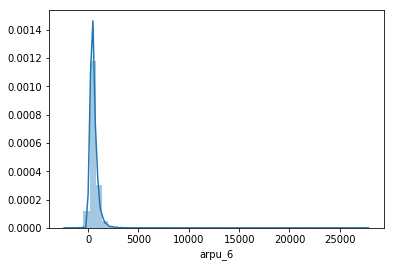

In [41]:
univariate(data_set.arpu_6)

count    29953.000000
mean       237.201202
std        457.508915
min          0.000000
25%         15.660000
50%         72.990000
75%        240.630000
max      10752.560000
Name: onnet_mou_8, dtype: float64


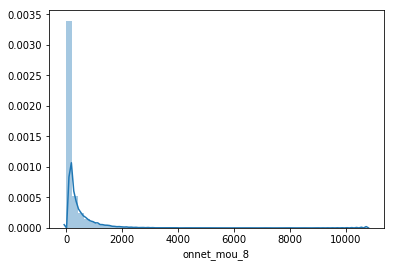

In [42]:
univariate(data_set.onnet_mou_8)

# Bivariate Analysis

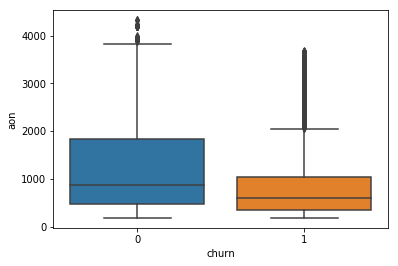

In [43]:
bivariate(data_set.churn, data_set.aon)

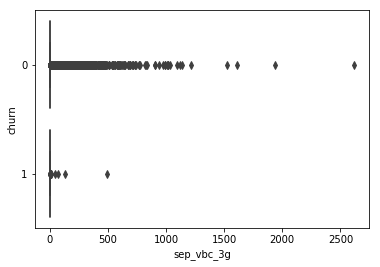

In [44]:
bivariate(data_set.sep_vbc_3g, data_set.churn)

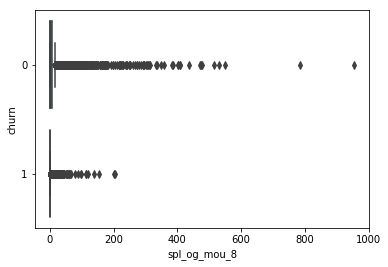

In [45]:
bivariate(data_set.spl_og_mou_8, data_set.churn)

# Outlier Treatment for numeric columns

In [46]:
#Mean+3sigma,mean -3sigma  
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [47]:
# cap outliers in the numeric columns 
#data standardizaton for numeric coulumns
data_set[num_cols] = data_set[num_cols].apply(cap_outliers, axis=0)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

# Modeling

In [48]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from imblearn.metrics import sensitivity_specificity_support

In [49]:
# change churn to numeric
data_set['churn'] = pd.to_numeric(data_set['churn'])

In [50]:

# divide data into train and test
X = data_set.drop("churn", axis = 1)
y = data_set.churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4, stratify = y)

In [51]:
# print shapes of train and test sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(22464, 164)
(22464,)
(7489, 164)
(7489,)


In [52]:
# standardizing the categorical values
train = pd.concat([X_train, y_train], axis=1)

# aggregate the categorical variables
print(train.groupby('night_pck_user_6').churn.mean())
print(train.groupby('night_pck_user_7').churn.mean())
print(train.groupby('night_pck_user_8').churn.mean())
print(train.groupby('fb_user_6').churn.mean())
print(train.groupby('fb_user_7').churn.mean())
print(train.groupby('fb_user_8').churn.mean())

night_pck_user_6
-1.0    0.099286
 0.0    0.066011
 1.0    0.102236
Name: churn, dtype: float64
night_pck_user_7
-1.0    0.115083
 0.0    0.055387
 1.0    0.065517
Name: churn, dtype: float64
night_pck_user_8
-1.0    0.141152
 0.0    0.028973
 1.0    0.027132
Name: churn, dtype: float64
fb_user_6
-1.0    0.099286
 0.0    0.076087
 1.0    0.066190
Name: churn, dtype: float64
fb_user_7
-1.0    0.115083
 0.0    0.063063
 1.0    0.054985
Name: churn, dtype: float64
fb_user_8
-1.0    0.141152
 0.0    0.062857
 1.0    0.025074
Name: churn, dtype: float64


In [53]:
# replace categories with aggregated values in each categorical column
mapping = {'night_pck_user_6' : {-1: 0.099286, 0: 0.066011, 1: 0.102236},
           'night_pck_user_7' : {-1: 0.115083, 0: 0.055387, 1: 0.065517},
           'night_pck_user_8' : {-1: 0.141152, 0: 0.028973, 1: 0.027132},
           'fb_user_6'        : {-1: 0.099286, 0: 0.076087, 1: 0.066190},
           'fb_user_7'        : {-1: 0.115083, 0: 0.063063, 1: 0.054985},
           'fb_user_8'        : {-1: 0.141152, 0: 0.062857, 1: 0.025074}
          }
X_train.replace(mapping, inplace = True)
X_test.replace(mapping, inplace = True)

/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)


In [54]:
# print churn ratio
print("Churn Ratio:")
print(train.churn.value_counts()*100/train.shape[0])

Churn Ratio:
0    91.87589
1     8.12411
Name: churn, dtype: float64


# Class balancing

In [55]:
#there is a class imbalance in the samples. Hence oversampling the minority is done to bring class balance
#smote
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_out, y_train_out = sm.fit_sample(X_train, y_train.ravel()) 

In [56]:
X_train = pd.DataFrame(data=X_train_out,columns=X_train.columns)
y_train = pd.DataFrame(data= y_train_out,columns=['churn'])


In [57]:
#apply pca to train data
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])

In [58]:

pca.fit(X_train)
churn_pca = pca.fit_transform(X_train)

In [59]:
# extract pca model from pipeline
pca = pca.named_steps['pca']

# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0       11.03
1       21.63
2       27.81
3       32.48
4       36.69
5       40.13
6       43.08
7       45.78
8       48.25
9       50.36
10      52.27
11      54.15
12      55.93
13      57.59
14      59.21
15      60.72
16      62.19
17      63.55
18      64.84
19      66.04
20      67.19
21      68.31
22      69.39
23      70.43
24      71.43
25      72.40
26      73.33
27      74.24
28      75.12
29      75.98
30      76.80
31      77.59
32      78.37
33      79.13
34      79.87
35      80.57
36      81.26
37      81.91
38      82.51
39      83.10
40      83.67
41      84.22
42      84.75
43      85.26
44      85.76
45      86.23
46      86.69
47      87.14
48      87.57
49      87.98
50      88.39
51      88.78
52      89.15
53      89.50
54      89.85
55      90.20
56      90.54
57      90.88
58      91.21
59      91.53
60      91.84
61      92.15
62      92.44
63      92.73
64      93.00
65      93.25
66      93.50
67      93.75
68      93.99
69      94.23
70      94.46
71    

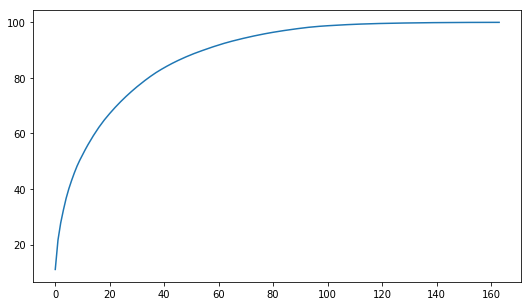

In [60]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)

# from the plots its clear that around 60 components can clearly adress 90% variance

# PCA With 60 components

In [61]:

# create pipeline
PCA_VARS = 60
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [62]:

# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8297398129754349

# Evaluate on test data

In [63]:

# predict churn on test data
y_pred = pipeline.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[5611 1270]
 [ 101  507]]
Sensitivity: 	0.83
Specificity: 	0.82
AUC:    	 0.89


# Hyperparameter tuning - PCA and Logistic Regression

In [64]:
# PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression()

# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [60, 80], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [65]:

# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarnin

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('logistic',
                                        LogisticRe...
                                                           multi_class='warn',
       

In [66]:
# cross validation results
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,4.297885,0.111901,0.052909,0.005147,0.1,l1,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",0.902052,0.902273,0.898131,0.902667,0.903958,0.901816,0.001957,26
1,4.855849,0.208317,0.070955,0.008835,0.1,l1,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",0.906769,0.905120,0.901875,0.908268,0.908405,0.906087,0.002420,16
2,4.407860,0.133942,0.056841,0.002591,0.1,l2,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.902088,0.901648,0.897919,0.902979,0.903581,0.901643,0.001980,32
3,4.957022,0.030118,0.080468,0.006462,0.1,l2,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.906971,0.905304,0.902105,0.908497,0.908507,0.906277,0.002397,11
4,3.520365,0.360232,0.062228,0.007417,0.5,l1,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",0.902788,0.902121,0.898265,0.902741,0.903397,0.901862,0.001843,23
5,4.793161,0.228370,0.082335,0.015096,0.5,l1,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",0.906954,0.905272,0.902130,0.908383,0.908433,0.906234,0.002355,14
6,4.252832,0.237812,0.069458,0.014122,0.5,l2,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.901961,0.901535,0.898448,0.903258,0.904015,0.901843,0.001916,24
7,5.556193,0.277157,0.091312,0.009440,0.5,l2,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.906926,0.905384,0.902155,0.908659,0.908563,0.906337,0.002412,4
8,4.068281,0.161893,0.057958,0.011693,1,l1,60,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",0.901836,0.902280,0.898241,0.902801,0.903814,0.901794,0.001895,28
9,5.474947,0.094499,0.073301,0.011277,1,l1,80,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",0.906894,0.905326,0.902210,0.908503,0.908474,0.906281,0.002350,9


In [67]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.9063792459076392
Best hyperparameters:  {'logistic__C': 2, 'logistic__penalty': 'l1', 'pca__n_components': 80}


In [68]:
#predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[5654 1227]
 [ 104  504]]
Sensitivity: 	0.83
Specificity: 	0.82
AUC:    	 0.9


# Best Feature selection method

In [69]:
# run a random forest model on train data
max_features = int(round(np.sqrt(X_train.shape[1])))    # number of variables to consider to split each node
print(max_features)

rf_model = RandomForestClassifier(n_estimators=100, max_features=max_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=4, verbose=1)

13


In [70]:
# fit model
rf_model.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   42.5s finished


RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
                       criterion='gini', max_depth=None, max_features=13,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=True,
                       random_state=4, verbose=1, warm_start=False)

In [71]:

# OOB score
rf_model.oob_score_

0.9681912883376133

In [72]:
# predictors
features = X_train.columns

# feature_importance
importance = rf_model.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

Sum of importance= 100.00000000000001


,variables,importance_percentage
0,roam_og_mou_8,3.047162
1,total_ic_mou_8,2.744395
2,loc_ic_mou_8,2.692236
3,fb_user_8,2.682614
4,night_pck_user_8,2.525931
5,roam_ic_mou_8,2.400826
6,last_day_rch_amt_8,2.173054
7,arpu_diff,1.967238
8,loc_ic_t2m_mou_8,1.817294
9,total_rech_amt_diff,1.727702


In [74]:

# extract top 'n' features
top_n = 30
top_features = feature_importance.variables[0:top_n]

In [75]:

top_features = ['total_ic_mou_8', 'total_rech_amt_diff', 'total_og_mou_8', 'arpu_8', 'roam_ic_mou_8', 'roam_og_mou_8', 
                'std_ic_mou_8', 'av_rech_amt_data_8', 'std_og_mou_8']
X_train = X_train[top_features]
X_test = X_test[top_features]

In [76]:

# logistic regression
steps = [('scaler', StandardScaler()), 
         ("logistic", LogisticRegression(class_weight={0:0.1, 1:0.9}))
        ]

# compile pipeline
logistic = Pipeline(steps)

# hyperparameter space
params = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [77]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    5.6s finished
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight={0: 0.1,
                                                                         1: 0.9},
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ra

In [78]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8844895358818731
Best hyperparameters:  {'logistic__C': 0.1, 'logistic__penalty': 'l1'}


In [79]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[1845 5036]
 [  21  587]]
Sensitivity: 	0.97
Specificity: 	0.27
ROC:    	 0.88


In [80]:
logistic_model = model.best_estimator_.named_steps['logistic']

In [81]:
# intercept
intercept_df = pd.DataFrame(logistic_model.intercept_.reshape((1,1)), columns = ['intercept'])

In [82]:
# coefficients
coefficients = logistic_model.coef_.reshape((9, 1)).tolist()
coefficients = [val for sublist in coefficients for val in sublist]
coefficients = [round(coefficient, 3) for coefficient in coefficients]

logistic_features = list(X_train.columns)
coefficients_df = pd.DataFrame(logistic_model.coef_, columns=logistic_features)

In [83]:
# concatenate dataframes
coefficients = pd.concat([intercept_df, coefficients_df], axis=1)
coefficients

,intercept,total_ic_mou_8,total_rech_amt_diff,total_og_mou_8,arpu_8,roam_ic_mou_8,roam_og_mou_8,std_ic_mou_8,av_rech_amt_data_8,std_og_mou_8
0,1.932883,-0.855149,-0.735413,-1.405269,0.301654,-0.037583,0.291294,-0.029162,-0.56896,0.976656


# Business solutions to the churn problem

In [ ]:
#1 From the above table, it shall be observed that the features with the positive coeficients contribute towards churning
#2 arpu_8 , roam_og_mou_8,std_og_mou_8 are the main features which will contribute to the churn
#3 The company should keep an eye on the average revenue generated by the user and if its drops unusually the customer shall
#. be contacted and excutive should also try to get the customer feedback
#4. The roaming and std charges have an impact on high value customers. Attractive packages shall be rolled out to  high value customers.